<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:30px; text-align: center;"><font size=4 color=blue><b>학습목표</b></font></td></tr>
    <tr><td style="border: 1px solid black; text-align: left;"><font size=3>○ 에지 추출 방법에 대해 학습한다.<br><br>
○ 이미지 필터링 방법에 대해 학습한다.
</font></td></tr>
</table>

### 1. 에지 개념 및 종류
- 에지(Edge) : 픽셀값이 급격하게 변하는 부분
- 에지 검출 방법
    - 1차 미분 : Sobel, Prewitt, Robert
    - 2차 미분 : 라플라시안, Log, Dog
    - Canny
    - Line 
- 에지의 용도 : 물체의 모양, 위치, 크기 등에 정보

#### 1.1 Sobel 에지 추출기
- 에지 추출의 가장 대표적인 1차 미분 연산자 중 하나
- 노이즈에 대체적으로 강력하지만 대각선 방향의 에지에 더 민감하게 반응

- <font color=red>result = cv2.addWeighted(x, a, y, b, c)</font>
  - 두 이미지를 각각 가중치를 주어 합침
  - 가중치의 값이 큰 이미지가 좀더 선명하게 나타남
  - result = x * a + y * b + c

- <font color=red>cv2.Sobel(src, depth, dx, dy, ksize)</font>
    - depth : 출력 이미지의 데이터 타입 (-1 이면 입력과 동일), 출력 이미지의 정밀도
    - dx : x 방향 미분 차수
    - dy : y 방향 미분 차수
    - ksize : 커널 크기 (홀수 값을 사용하며, 최대 31까지 설정)

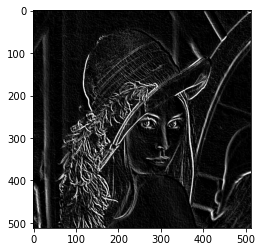

In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('./images/lenna.png', cv2.IMREAD_GRAYSCALE)

# 소벨필터 (연구를 통해 나온값이므로 고정)
sobel_x = np.array([[1,2,1], [0,0,0],[-1,-2,-1]])
sobel_y = np.array([[-1,0,1], [-2,0,2],[-1,0,1]])

img2 = cv2.filter2D(img, -1, sobel_x) # x축으로만 필터적용
img3 = cv2.filter2D(img, -1, sobel_y) # y축으로만 필터적용

final = cv2.addWeighted(img2, 1, img3, 1, 0)

# plt.subplot(1,2,1)
# plt.imshow(img2, cmap='gray')

# plt.subplot(1,2,2)
# plt.imshow(img3, cmap='gray')

plt.imshow(final, cmap='gray')


plt.show()


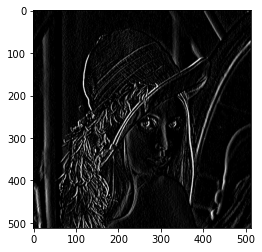

In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('./images/lenna.png', cv2.IMREAD_GRAYSCALE)

sobel_x = cv2.Sobel(img, -1, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, -1, 0, 1, ksize=3)

final = cv2.addWeighted(sobel_x, 1, sobel_y, 1, 0)

plt.imshow(sobel_x, cmap='gray')
plt.show()

#### 1.2 Canny 에지 추출기

- <font color=red>cv2.Canny(src, minVal, maxVal)</font>
  - minVal : 인접한 에지와 연결 여부를 판단하는 임계값 - 작으면 에지와 에지를 더 많이 연결
  - maxVal : 에지 여부 판단하는 임계값 - 작으면 에지가 더 많이 검출
- Canny 연산자는 픽셀의 변화분이 maxVal이상이면 에지 (강한 에지)로
- 사이값이면 연결성으로 에지로 판단 (약한 에지)하고
- 픽셀의 변화분이 minVal 이하이면 에지가 아니라고 판단

In [30]:
# Canny 
# 성능이 우월하다.

# 구현이 복잡하고 실행 시간이 훨씬 길다.
# 실시간 영상처리 비용과 속도에 손해를 본다.

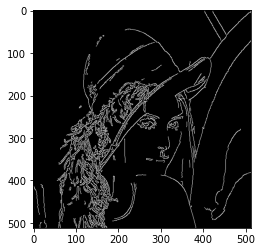

In [18]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('./images/lenna.png', cv2.IMREAD_GRAYSCALE)

final = cv2.Canny(img, 100,200)

plt.imshow(final, cmap='gray')
plt.show()

### 2. 이미지 선명도 분석
- Laplacian 필터 이용

    - Laplacian(src,depth)
        - src : 입력 이미지 및 영상
        - depth : 출력영상 데이터 타입, -1이면 입력과 같은 타입 사용

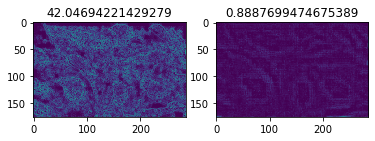

In [23]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img1 = cv2.imread('./images/cell1.jpg', cv2.IMREAD_COLOR)
img2 = cv2.imread('./images/cell2.jpg', cv2.IMREAD_COLOR)

img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# 에지 추출
result1 = cv2.Laplacian(img1_gray, -1)
result2 = cv2.Laplacian(img2_gray, -1)

# 선명도 계신
d1 = np.average(result1)
d2 = np.average(result2)

plt.subplot(1,2,1)
plt.title(f'{d1}')
plt.imshow(result1)

plt.subplot(1,2,2)
plt.title(f'{d2}')
plt.imshow(result2)
plt.show()


#### 2.1 다른 선명도 계산법

In [26]:
# 선명도 차이구분을 더 쉽게하기위해 제곱한다.

def get_Definition(img):
    sum_data = 0

    for y in range(len(img)):
        for x in range(len(img[0])):
            
            sum_data += (int(img[y,x]) **2)
    
    avg = sum_data/ (len(img) * len(img[0]))

    return int(avg)

In [28]:
img1 = cv2.imread('./images/cell1.jpg', cv2.IMREAD_COLOR)
img2 = cv2.imread('./images/cell2.jpg', cv2.IMREAD_COLOR)

img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

result1 = cv2.Canny(img1_gray, 100,200)
result2 = cv2.Canny(img2_gray, 100,200)

d1 = get_Definition(result1)
d2 = get_Definition(result2)

print('result1 : ',d1, ', result2 : ', d2)

result1 :  18627 , result2 :  0


### 2.2 소벨 에지 검출기를 사용하여 선명도 구하기

In [31]:
img1 = cv2.imread('./images/cell1.jpg', cv2.IMREAD_COLOR)
img2 = cv2.imread('./images/cell2.jpg', cv2.IMREAD_COLOR)

img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

sobel_x1 = cv2.Sobel(img1_gray, -1, 1, 0, ksize=3)
sobel_y1 = cv2.Sobel(img1_gray, -1, 0, 1, ksize=3)
sobel_x2 = cv2.Sobel(img2_gray, -1, 1, 0, ksize=3)
sobel_y2 = cv2.Sobel(img2_gray, -1, 0, 1, ksize=3)

final1 = cv2.addWeighted(sobel_x1, 1, sobel_y1, 1, 0)
final2 = cv2.addWeighted(sobel_x2, 1, sobel_y2, 1, 0)

d1 = get_Definition(final1)
d2 = get_Definition(final2)

print('result1 : ',d1, ', result2 : ', d2)

result1 :  15094 , result2 :  663


### 3. 이미지 필터

#### 3.1 motion blur
- 특정한 방향으로 움직이는 형상을 표현

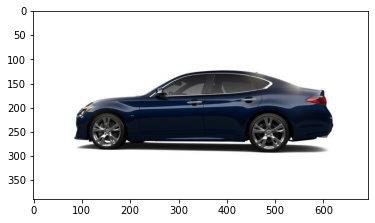

In [36]:
img = cv2.imread('./images/car3.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()


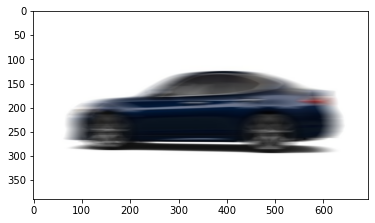

In [46]:
size = 50

kernal_mb = np.zeros((size,size))

# x축 방향으로 블러 처리하기 위한 필터 생성
# 필터 중앙의 행의 값을 1로 할당한다.

kernal_mb[int((size-1)/2), :]=1

kernal_mb = kernal_mb/ size # 평균(블러링 량 설정)

img2 = cv2.filter2D(img, -1, kernal_mb)

plt.imshow(img2)
plt.show()

#### 3.2 샤프닝(sharpnin)필터
- 이미지의 에지 성분을 날카롭게 하는 효과

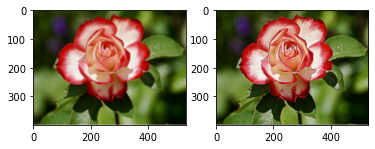

In [49]:
import cv2

img = cv2.imread('./images/flower.PNG', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

kernle_sp = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])

img2 = cv2.filter2D(img,-1,kernle_sp)

plt.subplot(1,2,1)
plt.imshow(img)

plt.subplot(1,2,2)
plt.imshow(img2)
plt.show()

#### 3.3 감마(Gamma)보정
- 이미지가 너무 어둡거나 밝은 경우, 픽셀 값의 변화를 통해 밝기를 보정하는 작업
- gamma > 1 : 어두운 영역의 변홥폭은 크고, 밝은 영역의 변화폭은 작음
- gamma < 1 : 밝은 영역의 변화폭이 크고, 어두운 영역의 변화폭은 작다.

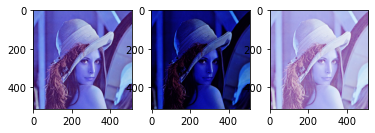

In [53]:
# 감마보정 공식
def gamma(img, g=1.0):  # img는 픽셀값(0~255)
    inv_g = 1/g
    output = np.uint8(((img/255)**inv_g) * 255)

    return output

img = cv2.imread('./images/lenna.png')

img2 = gamma(img, g = 0.3)
img3 = gamma(img, g = 2.5)

plt.subplot(1,3,1)
plt.imshow(img)

plt.subplot(1,3,2)
plt.imshow(img2)

plt.subplot(1,3,3)
plt.imshow(img3)
plt.show()